In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set seed for reproducibility
np.random.seed(42)

# ----------------------------------------------
# Step 1: Generate synthetic dataset
# ----------------------------------------------

# Parameters
num_machines = 5  # Number of machines to simulate
days = 90         # Number of days to simulate
readings_per_day = 24  # Number of readings per day (hourly)

# Create time series
start_date = datetime(2025, 1, 1)
dates = [start_date + timedelta(hours=i) for i in range(days * readings_per_day)]

# Create empty DataFrame to store all data
columns = ['timestamp', 'machine_id', 'temperature', 'pressure', 'vibration', 
           'rotation_speed', 'voltage', 'anomaly']
data = pd.DataFrame(columns=columns)

# For each machine, generate sensor data
for machine_id in range(1, num_machines + 1):
    
    # Base operating parameters - slightly different for each machine
    base_temp = 60 + np.random.uniform(-5, 5)
    base_pressure = 100 + np.random.uniform(-10, 10)
    base_vibration = 0.5 + np.random.uniform(-0.1, 0.1)
    base_rotation = 1000 + np.random.uniform(-50, 50)
    base_voltage = 220 + np.random.uniform(-5, 5)
    
    # Create dataframe for this machine
    machine_data = pd.DataFrame(columns=columns)
    machine_data['timestamp'] = dates
    machine_data['machine_id'] = machine_id
    
    # Generate normal sensor readings with daily patterns and some trend
    hours = np.arange(len(dates))
    
    # Daily patterns
    daily_cycle = np.sin(2 * np.pi * hours / 24)
    weekly_cycle = np.sin(2 * np.pi * hours / (24 * 7))
    
    # Small trend over time
    trend = np.linspace(0, 1, len(dates))
    
    # Generate readings with patterns and noise
    machine_data['temperature'] = base_temp + 2 * daily_cycle + 0.5 * weekly_cycle + 0.5 * trend + np.random.normal(0, 1, len(dates))
    machine_data['pressure'] = base_pressure - 5 * daily_cycle + 2 * weekly_cycle - 1 * trend + np.random.normal(0, 2, len(dates))
    machine_data['vibration'] = base_vibration + 0.1 * daily_cycle + 0.05 * weekly_cycle + 0.02 * trend + np.random.normal(0, 0.05, len(dates))
    machine_data['rotation_speed'] = base_rotation + 20 * daily_cycle + 10 * weekly_cycle - 5 * trend + np.random.normal(0, 10, len(dates))
    machine_data['voltage'] = base_voltage + 5 * daily_cycle + 2 * weekly_cycle + np.random.normal(0, 1, len(dates))
    
    # No anomalies initially
    machine_data['anomaly'] = 0
    
    # Add anomalies for each machine - different patterns
    if machine_id == 1:
        # Machine 1: Sudden temperature spike in day 20
        anomaly_start = 20 * readings_per_day
        anomaly_end = anomaly_start + 48  # 2 days of anomaly
        machine_data.loc[anomaly_start:anomaly_end, 'temperature'] += np.linspace(5, 15, anomaly_end - anomaly_start + 1)
        machine_data.loc[anomaly_start:anomaly_end, 'anomaly'] = 1
    
    elif machine_id == 2:
        # Machine 2: Gradual increase in vibration starting from day 30
        anomaly_start = 30 * readings_per_day
        anomaly_end = len(machine_data) - 1
        for i in range(anomaly_start, anomaly_end + 1):
            progress = (i - anomaly_start) / (anomaly_end - anomaly_start)
            machine_data.loc[i, 'vibration'] += 0.5 * progress**2
            # Mark as anomaly when it exceeds a threshold
            if machine_data.loc[i, 'vibration'] > base_vibration + 0.2:
                machine_data.loc[i, 'anomaly'] = 1
    
    elif machine_id == 3:
        # Machine 3: Periodic pressure drops starting from day 50
        anomaly_start = 50 * readings_per_day
        for i in range(anomaly_start, len(machine_data), 72):  # Every 3 days
            if i + 6 < len(machine_data):  # If we have 6 hours of data left
                machine_data.loc[i:i+6, 'pressure'] -= 20
                machine_data.loc[i:i+6, 'anomaly'] = 1
    
    elif machine_id == 4:
        # Machine 4: Correlated anomaly between rotation speed and voltage around day 40
        anomaly_start = 40 * readings_per_day
        anomaly_end = anomaly_start + 24  # 1 day
        machine_data.loc[anomaly_start:anomaly_end, 'rotation_speed'] -= np.linspace(50, 200, anomaly_end - anomaly_start + 1)
        machine_data.loc[anomaly_start:anomaly_end, 'voltage'] -= np.linspace(10, 30, anomaly_end - anomaly_start + 1)
        machine_data.loc[anomaly_start:anomaly_end, 'anomaly'] = 1
    
    else:
        # Machine 5: Short anomalies at random times
        anomaly_times = np.random.choice(range(10*readings_per_day, len(machine_data)), size=5, replace=False)
        for i in anomaly_times:
            # Short 4-hour anomaly
            if i + 4 < len(machine_data):
                machine_data.loc[i:i+4, 'temperature'] += 12
                machine_data.loc[i:i+4, 'vibration'] += 0.3
                machine_data.loc[i:i+4, 'anomaly'] = 1
    
    # Add to main dataset
    data = pd.concat([data, machine_data], ignore_index=True)

# Save the synthetic dataset to CSV
data.to_csv('maintenance_dataset.csv', index=False)

print("Dataset generated and saved to 'maintenance_dataset.csv'")

C:\Users\pc\AppData\Local\Temp\ipykernel_7952\4162500490.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, machine_data], ignore_index=True)


Dataset generated and saved to 'maintenance_dataset.csv'


AttributeError: module 'numpy' has no attribute 'iterable'

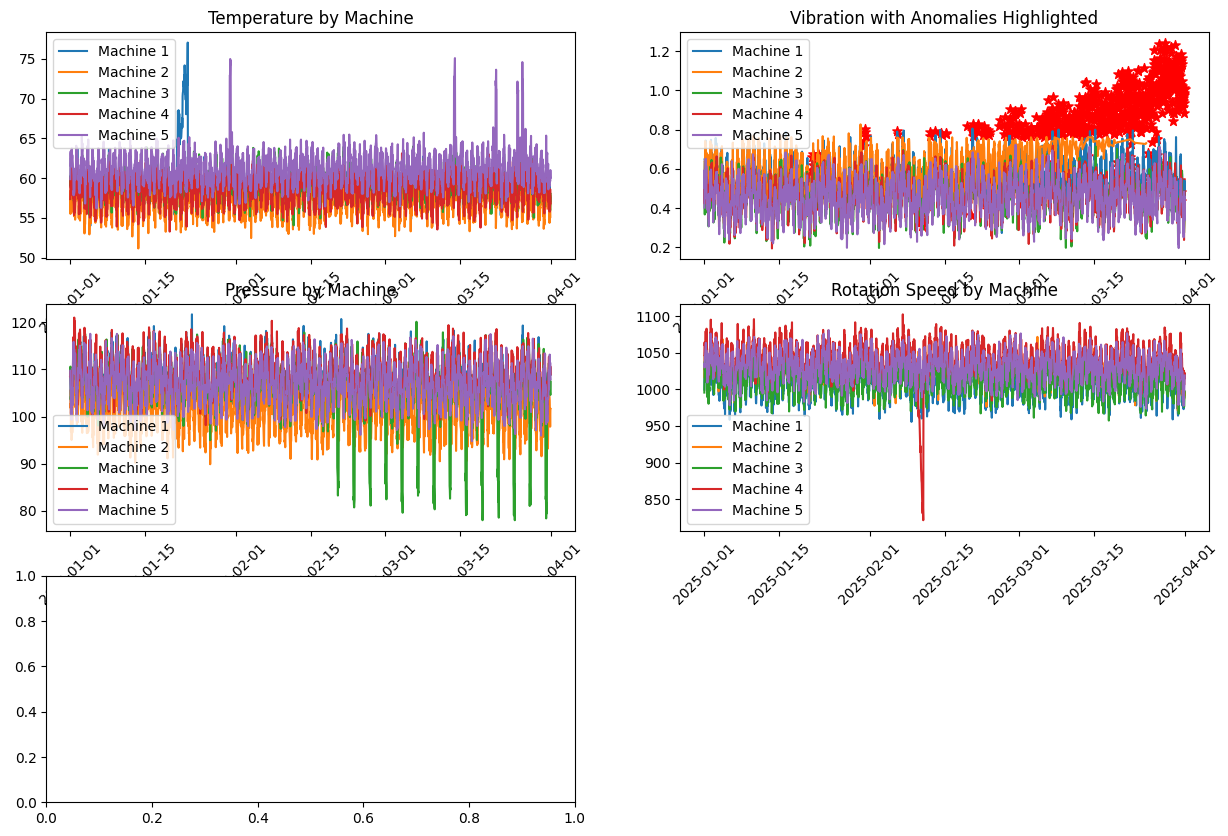

In [5]:
# Basic visualization
plt.figure(figsize=(15, 10))

# Plot temperature for all machines
plt.subplot(3, 2, 1)
for machine_id in range(1, num_machines + 1):
    machine_data = data[data['machine_id'] == machine_id]
    plt.plot(machine_data['timestamp'], machine_data['temperature'], label=f'Machine {machine_id}')
plt.title('Temperature by Machine')
plt.legend()
plt.xticks(rotation=45)

# Plot vibration with anomalies highlighted
plt.subplot(3, 2, 2)
for machine_id in range(1, num_machines + 1):
    machine_data = data[data['machine_id'] == machine_id]
    
    # Plot normal data
    normal_data = machine_data[machine_data['anomaly'] == 0]
    plt.plot(normal_data['timestamp'], normal_data['vibration'], label=f'Machine {machine_id}')
    
    # Highlight anomalies
    anomaly_data = machine_data[machine_data['anomaly'] == 1]
    if not anomaly_data.empty:
        plt.scatter(anomaly_data['timestamp'], anomaly_data['vibration'], 
                   color='red', marker='*', s=50)
plt.title('Vibration with Anomalies Highlighted')
plt.legend()
plt.xticks(rotation=45)

# Plot pressure
plt.subplot(3, 2, 3)
for machine_id in range(1, num_machines + 1):
    machine_data = data[data['machine_id'] == machine_id]
    plt.plot(machine_data['timestamp'], machine_data['pressure'], label=f'Machine {machine_id}')
plt.title('Pressure by Machine')
plt.legend()
plt.xticks(rotation=45)

# Plot rotation speed
plt.subplot(3, 2, 4)
for machine_id in range(1, num_machines + 1):
    machine_data = data[data['machine_id'] == machine_id]
    plt.plot(machine_data['timestamp'], machine_data['rotation_speed'], label=f'Machine {machine_id}')
plt.title('Rotation Speed by Machine')
plt.legend()
plt.xticks(rotation=45)

# Count anomalies by machine
plt.subplot(3, 2, 5)
anomaly_counts = data.groupby('machine_id')['anomaly'].sum()
plt.bar(anomaly_counts.index, anomaly_counts.values)
plt.xlabel('Machine ID')
plt.ylabel('Number of Anomalies')
plt.title('Anomaly Count by Machine')

# Print dataset summary
print(f"Dataset created with {len(data)} entries")
print(f"Number of anomalies: {data['anomaly'].sum()}")
print("Anomalies by machine:")
print(data.groupby('machine_id')['anomaly'].sum())

plt.tight_layout()
plt.savefig('dataset_visualization.png')
plt.close()